# Classificando caracteres utilizando rede MLP.
Este exemplo utiliza a base de dados MNIST, que consiste em imagens de caracteres numéricos escritos à mão.

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [21]:
# Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

## Etapa 02
Importar a base de dados MNIST do keras

Curiosidade: o Keras fornece um conjunto de base de dados para aprendizado. Veja mais em: https://keras.io/api/datasets/

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Etapa 03
Conhecer e plotar a base de dados

In [23]:
# Verificar a quantidade de dados para treinamento e validação
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


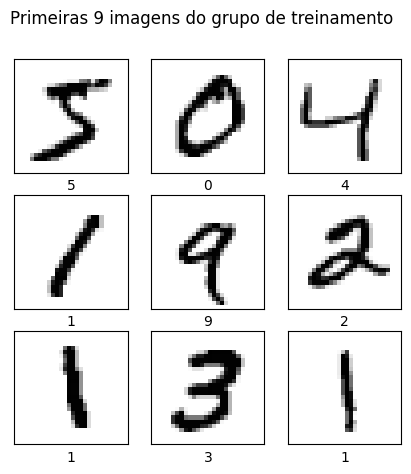

In [24]:
# Plotar imagem
plt.figure(figsize=(5,5))
plt.suptitle('Primeiras 9 imagens do grupo de treinamento')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [25]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Etapa 04
Pré-processar as imagens de forma que os valores de intensidade para os pixels fiquem entre 0 e 1.

In [27]:
x_train = x_train / 255
x_test = x_test / 255

In [28]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Etapa 05
Construir a rede neural utilizando o Keras.

Primeira camada (entrada): transforma o array bidimensional (28,28) para um array unidimensional (28*28=784).

Segunda camada: Uma camada com 128 neurônios.

Terceira camada (saída): implementa uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertença a uma das 10 classes.

In [30]:
keras.backend.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28, 28))),
model.add(Dense(128, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Etapa 06
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## Etapa 07
Treinar o modelo e realizar a validação.

Epoch 1/30


2024-10-01 17:15:56.787210: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8802 - loss: 0.4294 - val_categorical_accuracy: 0.9578 - val_loss: 0.1379
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9654 - loss: 0.1219 - val_categorical_accuracy: 0.9701 - val_loss: 0.0962
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9770 - loss: 0.0783 - val_categorical_accuracy: 0.9765 - val_loss: 0.0804
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9833 - loss: 0.0546 - val_categorical_accuracy: 0.9748 - val_loss: 0.0808
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9875 - loss: 0.0420 - val_categorical_accuracy: 0.9748 - val_loss: 0.0803
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9902 - loss: 0.0329 - val_categorical_accuracy: 0.9770 - val_loss: 0.0755
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.9915 - 

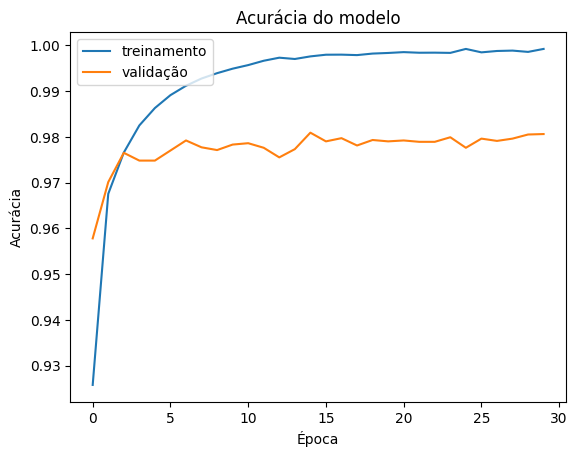

In [32]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

## Etapa 08
Realizar algumas predições. Experimente variar a amostra (variável i).

In [45]:
y_test[i].astype('uint8')

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


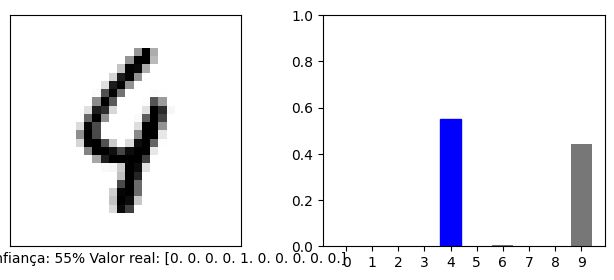

In [62]:
predictions = model.predict(x_test)
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 115

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  print(true_label)
  plt.grid(False)
  plt.xticks(range(10), class_names)
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  true_label_index = np.argmax(true_label)  # This converts to integer index
  thisplot[true_label_index].set_color('blue')

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(predictions[i], y_test[i], x_test[i])
plt.subplot(1,2,2)
plot_rate(predictions[i], y_test[i])
plt.show()

## Etapa 09
Encontrar todas as predições erradas.

In [77]:
error_classification = []

for i in range(len(predictions)):
  if (np.argmax(predictions[i]) != np.argmax(y_test[i])):
    error_classification.append(i)

print('Total de predições erradas: ', len(error_classification))
print('Lista das predições erradas: ', error_classification)

Total de predições erradas:  194
Lista das predições erradas:  [247, 290, 321, 340, 445, 495, 582, 613, 619, 659, 674, 684, 691, 720, 951, 956, 965, 1014, 1039, 1044, 1112, 1156, 1181, 1192, 1226, 1232, 1242, 1247, 1260, 1299, 1319, 1326, 1328, 1393, 1395, 1500, 1530, 1549, 1554, 1609, 1611, 1678, 1681, 1790, 1878, 1901, 1941, 1984, 2004, 2035, 2043, 2053, 2070, 2098, 2109, 2118, 2135, 2162, 2182, 2224, 2272, 2293, 2369, 2387, 2406, 2414, 2488, 2578, 2597, 2607, 2648, 2654, 2760, 2810, 2863, 2877, 2896, 2915, 2921, 2930, 2939, 2953, 2979, 3073, 3117, 3173, 3189, 3225, 3405, 3422, 3474, 3503, 3520, 3558, 3559, 3565, 3567, 3681, 3727, 3776, 3796, 3808, 3853, 3871, 3902, 3906, 3941, 3943, 4078, 4140, 4176, 4199, 4201, 4224, 4248, 4255, 4289, 4294, 4360, 4425, 4480, 4497, 4534, 4551, 4571, 4740, 4807, 4814, 4823, 4837, 4860, 4876, 4880, 4956, 5246, 5457, 5495, 5608, 5642, 5655, 5676, 5734, 5749, 5757, 5842, 5887, 5936, 5937, 5955, 5972, 5973, 5982, 6023, 6046, 6059, 6555, 6571, 6574, 6576,

# Informação complementar
## Realizar a predição de uma única imagem

Na Etapa 08, realizamos a predição de todas as amostras de validação e plotamos o resultado de uma única amostra para visualização, isso porque o Keras é otimizado para trabalhar com batch (coleções) de dados. Para realizar a predição de uma única imagem, os passos abaixo são necessários.

In [65]:
# Escolha da imagem
img_selected = 149
img = x_test[img_selected]
print(img.shape)

(28, 28)


Como o Keras trabalha com batch, é preciso adicionar a imagem desejada em uma lista cujo único elemento seja a imagem que se deseja predizer. Para isso, basta expandir as dimensões da imagem para 3, sendo o primeiro elemento a posição na lista.

In [66]:
# Reshape
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Com a única imagem na lista, é possível realizar a sua predição.

In [67]:
value_predicted = model.predict(img)
print(value_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[2.9146019e-10 1.7854996e-06 9.9536252e-01 1.0556102e-04 4.4900733e-03
  5.3828539e-06 1.9592414e-12 4.2632120e-09 2.0213517e-10 3.4685163e-05]]


Por fim, encontramos a maior probabilidade e exibimos o resultado, como na Etapa 08

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


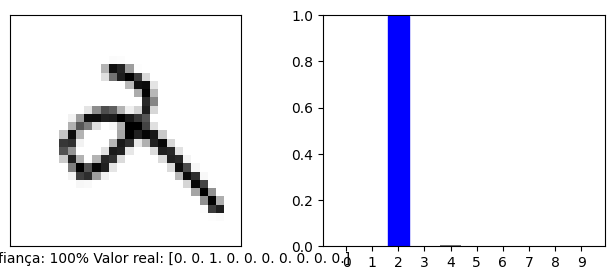

In [68]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(value_predicted, y_test[img_selected], x_test[img_selected])
plt.subplot(1,2,2)
plot_rate(value_predicted[0], y_test[img_selected])
plt.show()